In [1]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locs = face_recognition.face_locations(image)
    a, b, c, d = face_locs[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [29]:
import os

dir_path = os.getenv('HOME')+'/aiffel/e/e12_face_embedding/images'
image_path = os.getenv('HOME')+'/aiffel/e/e12_face_embedding/images/'
data_path = os.getenv('HOME')+'/aiffel/e/e12_face_embedding/data/'

file_list = os.listdir(dir_path)

print(dir_path)
print ("file_list: {}".format(file_list))
print(len(file_list))

/home/aiffel/aiffel/e/e12_face_embedding/images
file_list: ['효연.jpeg', '최유정.jpeg', '아이린1.jpeg', '조이.jpeg', '여자아이들수진.jpeg', '레인보우재경.jpg', '승희.jpeg', '은지.jpeg', '설현.jpeg', '도아.jpeg', '유리.jpg', '권은비.jpeg', '제시카.jpeg', '러블리즈예인.jpg', '문별.jpeg', '전소미.jpg', '잇지유나.jpg', '나인뮤지스경리.jpg', '케이.jpg', '신비.jpg', '슬기.jpeg', '사나.jpeg', '안유진.jpeg', '휘인.jpeg', '태연.jpeg', '리아.jpg', 'na1.jpg', '티파니.jpg', '크리스탈.jpeg', '웬디.jpeg', '잇지예지.jpeg', '이효리.jpg', '지수.jpeg', '비니.jpg', '나연.jpeg', '제니.jpeg', '수영.jpeg', '아이린.jpeg', '효정.jpeg', '청하.jpeg', '우기.jpg', '미미.jpg', '류진.jpg', '선미.jpeg', '하영.jpeg', '솔라.jpeg', '예리.jpeg', '채연.jpg', 'na2.jpg', '트와이스모모.jpeg', '리사.jpg', '지효.jpeg', '미나.jpeg', '수지.jpeg', '다현.jpeg', '민니.jpg', '유아.jpeg', '정연.jpeg', '혜리.jpeg', '사쿠라.jpeg', '로제.jpg', '윤아.jpeg', '화사.jpeg', '아이즈원민주.jpg', '아이유.jpeg', '아린.jpeg']
66


In [5]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# embedding = get_face_embedding(face)  
# embedding

In [30]:
def get_face_embedding_dict(dir_path, data_path):
    # print(dir_path)
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for i, file in enumerate(file_list):
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        
        # 얼굴 저장
        pillow_img = Image.fromarray(face)
        pillow_img.save(data_path + str(i) + "_" + file)
      
        # exception
        if len(embedding) > 0:
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [7]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# get_distance('obama', 'trump')

In [8]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [38]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top + 1):
        if i == 0: continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0],
                                                 sort_key_func(sorted_faces[i][0])))


In [ ]:
# who's closest looking to obama?
# get_nearest_face('obama')

# project. 나와 닮은 연예인 찾기
---
## 개인정보 보호를 위하여 `나 = 니콜라스 케이지` 로 변경

## step1. 사진 모으기

슬랙|에서 여자아이돌 사진 모아 비교

## 2. 얼굴 영역 자르기
---
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는데 도움이 될 것입니다.
```
#    힌트
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```

내 얼굴 사진 저장하기

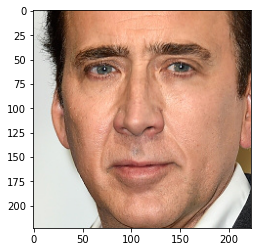

In [46]:
from PIL import Image


myface1 = get_cropped_face(image_path + "nick.jpg")
plt.imshow(myface1)

my_embedding = get_face_embedding(myface1)

비교 얼굴 사진 저장하기 -> get_embedding_dict() 함수 내부에 추가함!

## Step3. 얼굴 영역의 임베딩 추출하기

In [47]:
import numpy as np

In [48]:
embedding_dict = get_face_embedding_dict(image_path, data_path)

In [49]:
embedding_dict["nick"]

array([-0.01556575,  0.08099027,  0.08390582, -0.04412804, -0.13825223,
        0.00822679, -0.1254155 , -0.11453746,  0.07014453, -0.04306187,
        0.16604346,  0.0028498 , -0.20865543,  0.03259118,  0.09838394,
        0.09797565, -0.15340473, -0.07301021, -0.1267121 , -0.08483949,
       -0.00724177,  0.01709324,  0.02554207,  0.04393122, -0.16264099,
       -0.30063081, -0.10278198, -0.12469387,  0.1127281 , -0.12755127,
       -0.09577408, -0.07134651, -0.1878065 , -0.06693318,  0.03066101,
        0.01454979, -0.07782603, -0.09334185,  0.17993172,  0.03489921,
       -0.11299442,  0.10450201, -0.03892316,  0.23139012,  0.26527062,
        0.10873462,  0.05562999, -0.09457935,  0.14117208, -0.20833448,
        0.10149951,  0.13068782,  0.08322161,  0.05810703,  0.07543322,
       -0.13617519,  0.02138025,  0.0918636 , -0.25745261,  0.14268772,
        0.07360874, -0.09318523, -0.01658641, -0.08084355,  0.25763759,
        0.11455591, -0.09244505, -0.12314278,  0.16454318, -0.12

## Step4. 모은 연예인들과 비교하기

In [50]:
get_nearest_face("nick", 10)

순위 1 : 이름(nick2), 거리(0.4162347410114198)
순위 2 : 이름(레인보우재경), 거리(0.7587095638737466)
순위 3 : 이름(러블리즈예인), 거리(0.7673909487394729)
순위 4 : 이름(윤아), 거리(0.7761587624009051)
순위 5 : 이름(유리), 거리(0.7773006358688967)
순위 6 : 이름(화사), 거리(0.7807669630182035)
순위 7 : 이름(na2), 거리(0.7939439183214522)
순위 8 : 이름(지수), 거리(0.8061146571006929)
순위 9 : 이름(na1), 거리(0.8129727994781852)
순위 10 : 이름(다현), 거리(0.8175379270405468)


__안타깝게도 니콜라스 케이지와 닮은 여자 아이돌은 없었다...    
그렇다면 내 사진과 비교해보자__

In [51]:
get_nearest_face("na1", 10)

순위 1 : 이름(na2), 거리(0.2228537155816781)
순위 2 : 이름(나연), 거리(0.4235511288824404)
순위 3 : 이름(화사), 거리(0.43693254824099975)
순위 4 : 이름(아이유), 거리(0.43990737875076935)
순위 5 : 이름(류진), 거리(0.4405230931745667)
순위 6 : 이름(로제), 거리(0.4439971407639665)
순위 7 : 이름(채연), 거리(0.4458623491487779)
순위 8 : 이름(최유정), 거리(0.44872763423403433)
순위 9 : 이름(선미), 거리(0.45112604416584173)
순위 10 : 이름(아린), 거리(0.45739329670612966)


__na2는 na1과 동일인물이므로 그나마 나연, 화사와 가장 임베딩 벡터간 거리가 가깝다고 볼 수 있다.__

__본인 제외 순위__
1. 나연
2. 화사
3. 아이유
4. 류진
5. 로제
6. 채연
7. 최유정
8. 선미
9. 아린

## Step5. 다양한 재미있는 시각화 시도해 보기
---
- 아이린 사진으로 아이린 찾기
- thug 선글라스를 착용한 아이린...과연...?

In [538]:
import cv2
import dlib

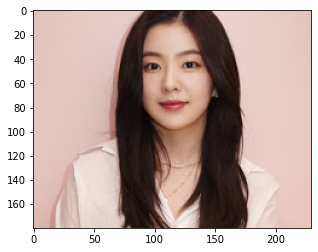

In [539]:
norm_img_path = os.getenv("HOME")+ "/aiffel/e/e12_face_embedding/project/그냥아이린.jpg"
norm_img = cv2.imread(norm_img_path)

# crop
norm_img = norm_img[70:250, 70:300]

img_show = norm_img.copy()
img_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)

# normal face
norm_img = img_show.copy()

# thug glasses face
thug_img = img_show.copy()
plt.imshow(img_rgb)

#norm_face = get_cropped_face(normal_img)
#plt.imshow(norm_face)

In [540]:
# 얼굴 랜드마크 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)


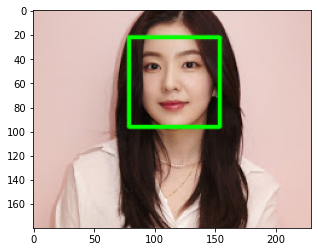

In [541]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [542]:
# landmark 모델 불러오기
model_path = os.getenv("HOME")+"/aiffel/e/e10_camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [543]:
# landmark_predictor - RGB image와 dlib.rectangle을 입력 받아 dlib.full_object_detection을 반환
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

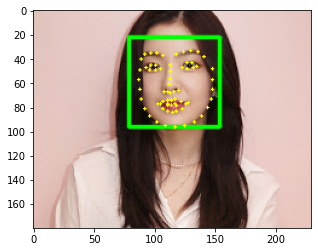

In [544]:
# landmark출력하기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 1, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

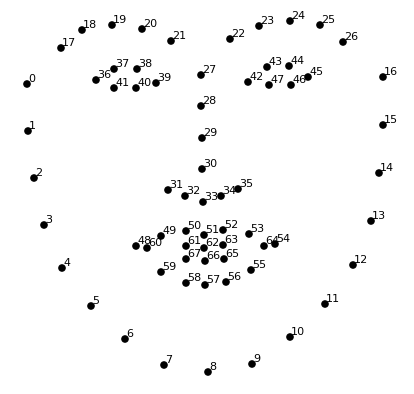

In [545]:
# 스티커 위치 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[0])
    x = landmark[0][0]
    y = landmark[0][1] + dlib_rect.width()//8
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(88, 49)
(x,y) : (88,58)
(w,h) : (76,76)


thug life sticker 적용

(256, 320, 4)


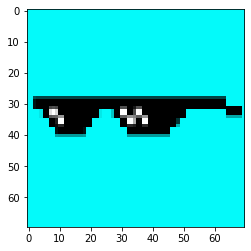

In [546]:
# deal with it 선글라스 이미지
sticker_path = os.getenv("HOME")+ "/aiffel/e/e12_face_embedding/deal-with-it-glasses.png"
sticker_img = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
print(sticker_img.shape)

# make mask of where the transparent bits are
trans_mask = sticker_img[:,:,3] == 0

# replace areas of transparency with certain color and not transparent
sticker_img[trans_mask] = [259, 250, 250, 255]

img_sticker = cv2.resize(sticker_img, (70, 70))[:,:,:3]

plt.imshow(img_sticker)

In [547]:
# 원본이미지에 스티커 이미지 추가하여  `x`, `y`좌표 조정
# 이미지 시작점은 TOP LEFT좌표이다!
refined_x = x + w//35 - 3  # left
refined_y = y - w//2 - 8     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (87,12)


(70, 70, 3)
(70, 70, 3)
87 12


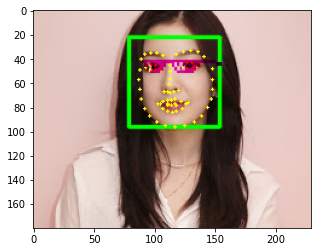

In [548]:
# sticker area : original img에서 스티커 적용할 위치를 crop한 부분
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

print(sticker_area.shape)
print(img_sticker.shape)
print(refined_x, refined_y)


img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=(255,0,255),sticker_area,img_sticker).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

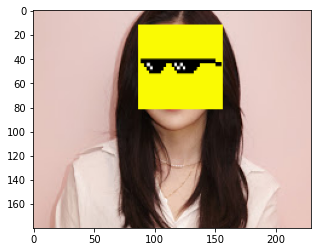

In [550]:
# 바운딩박스, landmark 제거
sticker_area = thug_img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
thug_img[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==(255,0,255),sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(thug_img, cv2.COLOR_BGR2RGB))
plt.show()